# **E- Commerce Dataset**
This dataset provides a comprehensive view of an e-commerce platform, featuring detailed information about products, customers, pricing, and sales trends. It is designed for data analysis, machine learning, and insights into online retail operations. The dataset is structured to help researchers and analysts explore various aspects of e-commerce, such as product popularity, customer preferences, and shipping performance.

## **This Dataset Is Well-Suited For Analysis & Research Purposes:**

* **Exploratory Data Analysis (EDA):** Analyze sales trends, product popularity, and customer preferences.
* **Visualization:** Create insightful charts to visualize product performance, regional sales, and shipping trends.
* **Customer Insights:** Understand customer segmentation based on demographics, preferences, and location.

**Machine Learning Applications:**
* **Regression:** Predict product popularity based on price, discount, and stock level.
* **Clustering:** Identify similar product categories for targeted marketing.
* **Classification:** Predict whether a product will be returned based on its features.

## **Review Chain**
* **Ensure That The Analysis Stack Is Loaded**
* **Analyzing The Data Source**
* **Analyze Sales Trends**
* **Analyze Product Popularity**
* **Analyze Popularity By 'Category'**
* **Analyze Customer Preferences By 'Category'.**
* **Visualize Findings**
* **Analyze Product Performance**
* **Analyze Regional Sales.**
* **Analyze Shipping Trends**
* **Customer Segmentation**

## Ensure That The Analysis Stack Is Loaded.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Analyzing The Data Source

In [2]:
df = pd.read_csv("D:/PYTHON 2/ᗪᗩTᗩ/OCTOBER/Machine Learning (ML)/E- Commerce Dataset/CSV/diversified_ecommerce_dataset.csv")
df.head()

,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index
0,P6879,Jacket,Apparel,53.85,5,15,150,S535,35-44,"New York, USA",Male,23.32,Standard,4.49,Yes,56
1,P5132,Camera,Electronics,761.26,10,15,224,S583,25-34,"London, UK",Female,20.88,Overnight,16.11,No,79
2,P2941,Sneakers,Footwear,1756.76,5,8,468,S118,25-34,"Tokyo, Japan",Non-Binary,16.43,Standard,4.93,No,40
3,P8545,Cookbooks,Books,295.24,10,15,25,S104,18-24,"Paris, France",Female,27.49,Standard,1.31,No,93
4,P4594,Camera,Electronics,832.00,10,12,340,S331,55+,"Tokyo, Japan",Male,45.93,Overnight,4.37,No,56


In [3]:
Data_Info = pd.DataFrame({"Column": df.columns,"Non-Null Count": df.notnull().sum().values,"Dtype": df.dtypes.values})
display(Data_Info)

,Column,Non-Null Count,Dtype
0,Product ID,1000000,object
1,Product Name,1000000,object
2,Category,1000000,object
3,Price,1000000,float64
4,Discount,1000000,int64
5,Tax Rate,1000000,int64
6,Stock Level,1000000,int64
7,Supplier ID,1000000,object
8,Customer Age Group,1000000,object
9,Customer Location,1000000,object


In [4]:
df.isnull().sum()

Product ID            0
Product Name          0
Category              0
Price                 0
Discount              0
Tax Rate              0
Stock Level           0
Supplier ID           0
Customer Age Group    0
Customer Location     0
Customer Gender       0
Shipping Cost         0
Shipping Method       0
Return Rate           0
Seasonality           0
Popularity Index      0
dtype: int64

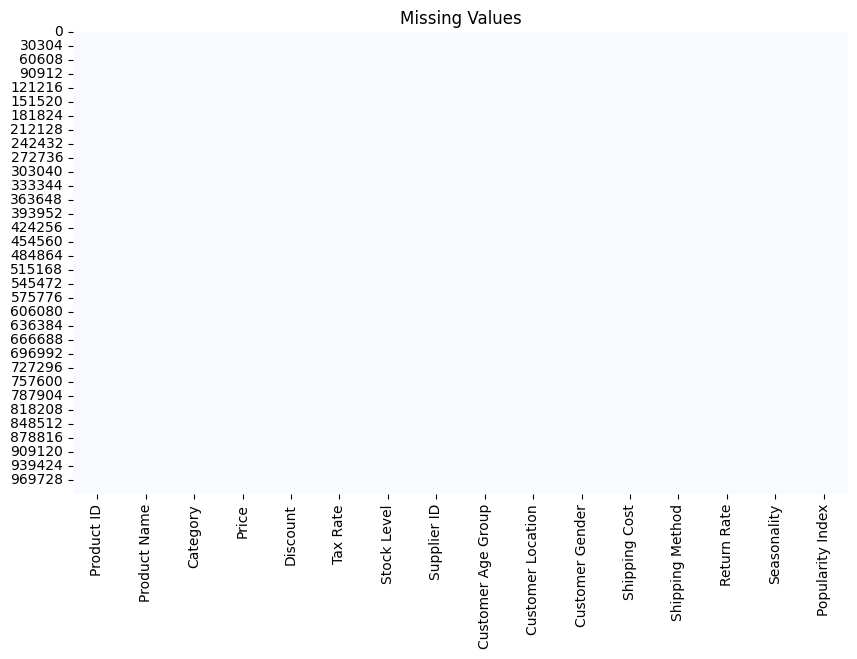

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)
plt.title("Missing Values")
plt.show()

## Analyze Sales Trends

In [6]:
Data_Type = pd.DataFrame({"Column": df.dtypes.index,"Dtype": df.dtypes.values})
display(Data_Type)

,Column,Dtype
0,Product ID,object
1,Product Name,object
2,Category,object
3,Price,float64
4,Discount,int64
5,Tax Rate,int64
6,Stock Level,int64
7,Supplier ID,object
8,Customer Age Group,object
9,Customer Location,object


## Analyze Product Popularity

In [7]:
Product_Popularity = df['Product Name'].value_counts()

Data_Info = pd.DataFrame({
    "Product Name": Product_Popularity.index,
    "Product Count": Product_Popularity.values
})

display(Data_Info.head())

,Product Name,Product Count
0,Graphic Novels,25396
1,Non-Fiction,25184
2,Textbooks,25141
3,Vacuum Cleaner,25138
4,Refrigerator,25111


## Analyze Popularity By 'Category'.

In [8]:
Category_Popularity = df.groupby('Category').size().sort_values(ascending=False)

Data_Info = pd.DataFrame({
    "Category": Category_Popularity.index,
    "Category Count": Category_Popularity.values
})

display(Data_Info.head())

,Category,Category Count
0,Books,200751
1,Electronics,200231
2,Footwear,200089
3,Home Appliances,199708
4,Apparel,199221


## Analyze Customer Preferences By 'Category'.

In [9]:
Customer_Preferences_By_Category = df.groupby('Category')['Product ID'].nunique().sort_values(ascending=False)

Data_Info = pd.DataFrame({
    "Category": Customer_Preferences_By_Category.index,
    "Count": Customer_Preferences_By_Category.values
})

display(Data_Info.head())

,Category,Count
0,Apparel,9000
1,Books,9000
2,Electronics,9000
3,Footwear,9000
4,Home Appliances,9000


## Analyze Customer Preferences By 'Payment Method'.

In [10]:
Payment_Method_Counts = df['Shipping Cost'].value_counts().sort_values(ascending=False)

Data_Info = pd.DataFrame({
    "Shipping Cost": Payment_Method_Counts.index,
    "Shipping Cost Count": Payment_Method_Counts.values
})

display(Data_Info.head())

,Shipping Cost,Shipping Cost Count
0,45.69,246
1,7.55,244
2,13.51,244
3,5.80,244
4,36.41,244


## Visualize Findings

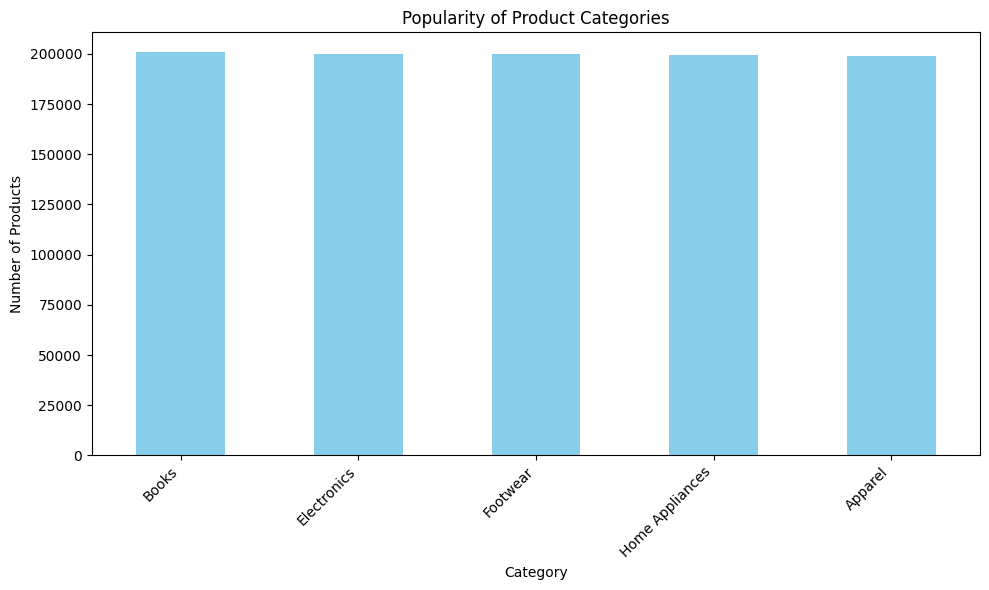

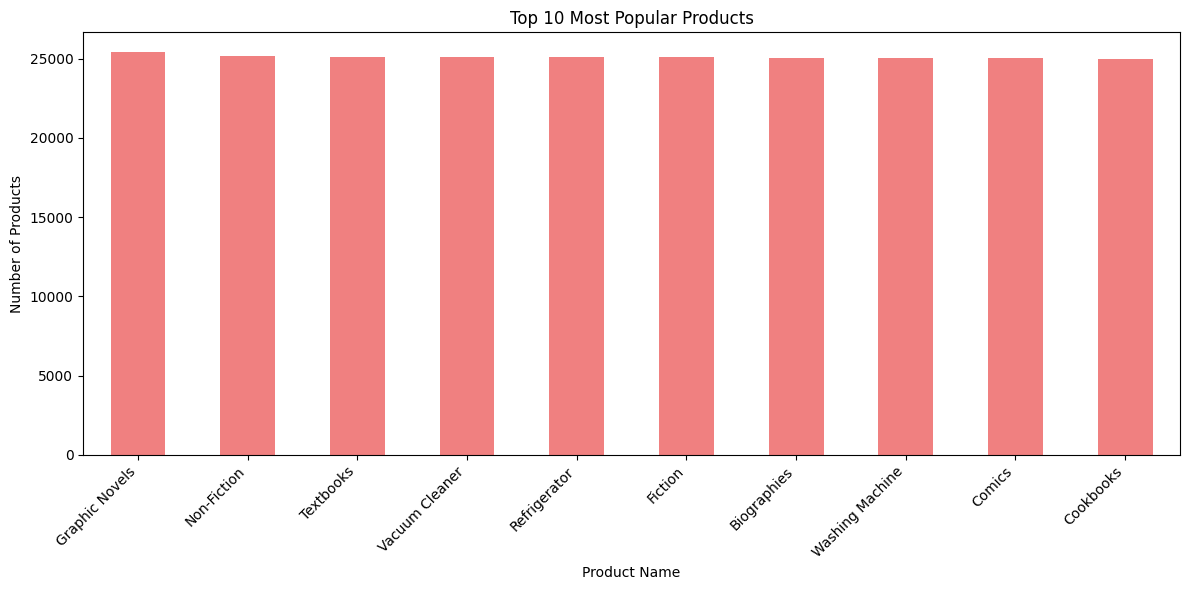

In [11]:
# Category Popularity
plt.figure(figsize=(10, 6))
Category_Popularity.plot(kind='bar', color='skyblue')
plt.title('Popularity of Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 product popularity
plt.figure(figsize=(12, 6))
Product_Popularity.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Product Performance

In [12]:
df['Total Price'] = df['Price'] * 1
Product_Sales = df.groupby('Product Name')['Total Price'].sum().sort_values(ascending=False)

Data_Info = pd.DataFrame({
    "Product Name": Product_Sales.index,
    "Price": Product_Sales.values
})

display(Data_Info.head(10))

,Product Name,Price
0,Graphic Novels,25628596.39
1,Non-Fiction,25444649.44
2,Comics,25268876.61
3,Fiction,25265157.83
4,Refrigerator,25231866.45
5,Vacuum Cleaner,25207484.95
6,Cookbooks,25201717.50
7,Textbooks,25181482.19
8,Microwave,25143450.97
9,Dishwasher,25069499.22


## Analyze Regional Sales.

In [13]:
Regional_Sales = df.groupby('Customer Location')['Total Price'].sum().sort_values(ascending=False)

Data_Info = pd.DataFrame({
    "Location": Regional_Sales.index,
    " Total Sales Regional": Regional_Sales.values
})

display(Data_Info.head(10))

,Location,Total Sales Regional
0,"Dubai, UAE",67494431.85
1,"Houston, USA",67460420.66
2,"Chicago, USA",67434102.36
3,"Mumbai, India",67339191.81
4,Singapore,67333179.56
5,"Cape Town, South Africa",67256380.46
6,"London, UK",67192152.11
7,"Tokyo, Japan",67134932.70
8,"Phoenix, USA",67126968.20
9,"Toronto, Canada",67028062.13


## Analyze Shipping Trends

In [14]:
Shipping_Method_Counts = df['Shipping Method'].value_counts().sort_values(ascending=False)


Data_Info = pd.DataFrame({
    "Shipping Method": Shipping_Method_Counts.index,
    "Count": Shipping_Method_Counts.values
})

display(Data_Info.head())

,Shipping Method,Count
0,Standard,333451
1,Express,333275
2,Overnight,333274


In [15]:
Shipping_Cost_Stats = df['Shipping Cost'].describe()


Data_Info = pd.DataFrame({
    "Shipping Cost": Shipping_Cost_Stats.index,
    "Shipping Cost Count": Shipping_Cost_Stats.values
})

display(Data_Info.head())

,Shipping Cost,Shipping Cost Count
0,count,1000000.000000
1,mean,24.985224
2,std,14.431730
3,min,0.000000
4,25%,12.490000


## Customer Segmentation

In [16]:
Customer_Age_Group_Counts = df['Customer Age Group'].value_counts().sort_values(ascending=False)

Data_Info = pd.DataFrame({
    "Age Group": Customer_Age_Group_Counts.index,
    "Count": Customer_Age_Group_Counts.values
})

display(Data_Info.head())

,Age Group,Count
0,18-24,200345
1,25-34,200313
2,35-44,200076
3,45-54,199937
4,55+,199329


In [17]:
Customer_Gender_Counts = df['Customer Gender'].value_counts().sort_values(ascending=False)


Data_Info = pd.DataFrame({
    "Gender": Customer_Gender_Counts.index,
    "Counts": Customer_Gender_Counts.values
})

display(Data_Info.head())

,Gender,Counts
0,Male,333791
1,Non-Binary,333541
2,Female,332668


In [18]:
Customer_Location_Counts = df['Customer Location'].value_counts().sort_values(ascending=False)

Data_Info = pd.DataFrame({
    "Customer Location": Customer_Location_Counts.index,
    "Counts": Customer_Location_Counts.values
})

display(Data_Info.head())

,Customer Location,Counts
0,"Dubai, UAE",67253
1,"Cape Town, South Africa",67153
2,"Houston, USA",67048
3,"Mumbai, India",66912
4,"Chicago, USA",66864


In [19]:
Age_Category_Counts = df.groupby(['Customer Age Group', 'Category']).size().reset_index(name='count')
Gender_Category_Counts = df.groupby(['Customer Gender', 'Category']).size().reset_index(name='count')
Location_Category_Counts = df.groupby(['Customer Location', 'Category']).size().reset_index(name='count')

display(Age_Category_Counts.head())
display(Gender_Category_Counts.head())
display(Location_Category_Counts.head())

,Customer Age Group,Category,count
0,18-24,Apparel,39848
1,18-24,Books,40413
2,18-24,Electronics,40026
3,18-24,Footwear,40105
4,18-24,Home Appliances,39953


,Customer Gender,Category,count
0,Female,Apparel,66361
1,Female,Books,66830
2,Female,Electronics,66256
3,Female,Footwear,66684
4,Female,Home Appliances,66537


,Customer Location,Category,count
0,"Berlin, Germany",Apparel,13254
1,"Berlin, Germany",Books,13196
2,"Berlin, Germany",Electronics,13213
3,"Berlin, Germany",Footwear,13259
4,"Berlin, Germany",Home Appliances,13164


## Visualize

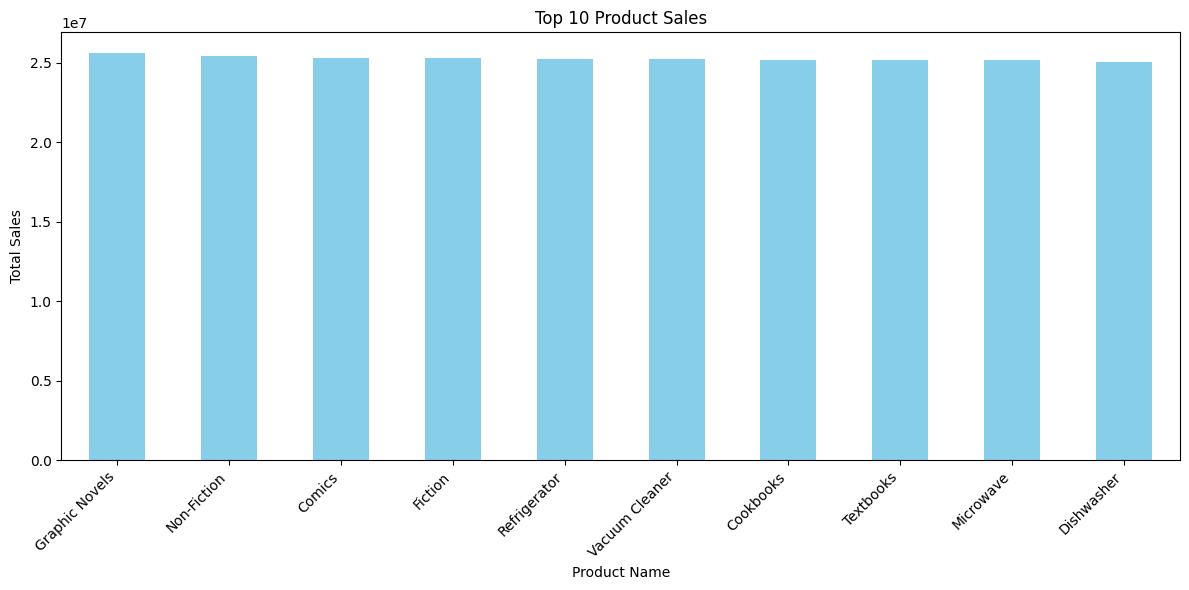

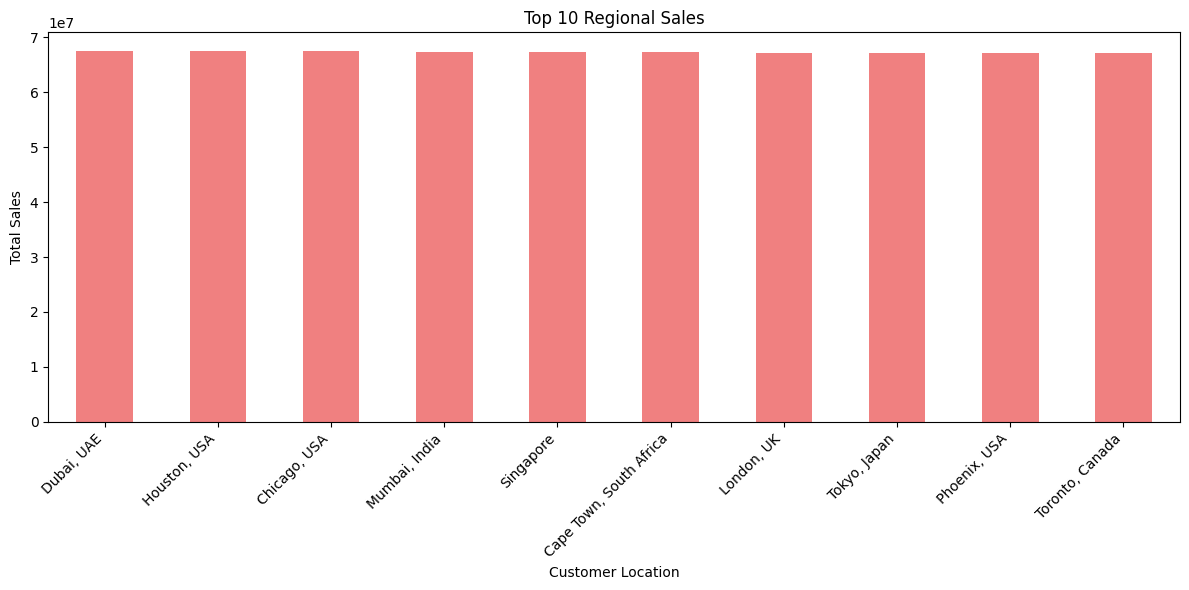

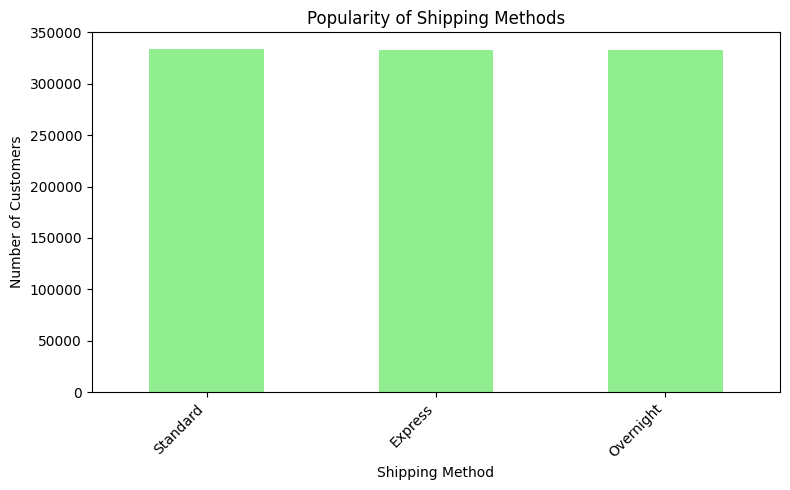

In [20]:
# Top 10 Product Sales
plt.figure(figsize=(12, 6))
Product_Sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 Regional Sales
plt.figure(figsize=(12, 6))
Regional_Sales.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Regional Sales')
plt.xlabel('Customer Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Shipping Method Counts
plt.figure(figsize=(8, 5))
Shipping_Method_Counts.plot(kind='bar', color='lightgreen')
plt.title('Popularity of Shipping Methods')
plt.xlabel('Shipping Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

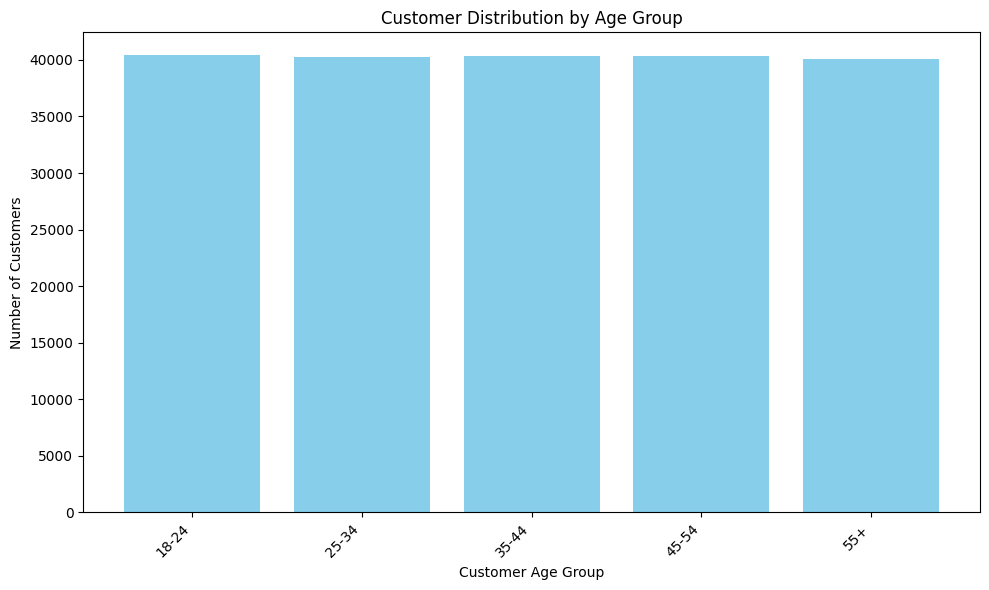

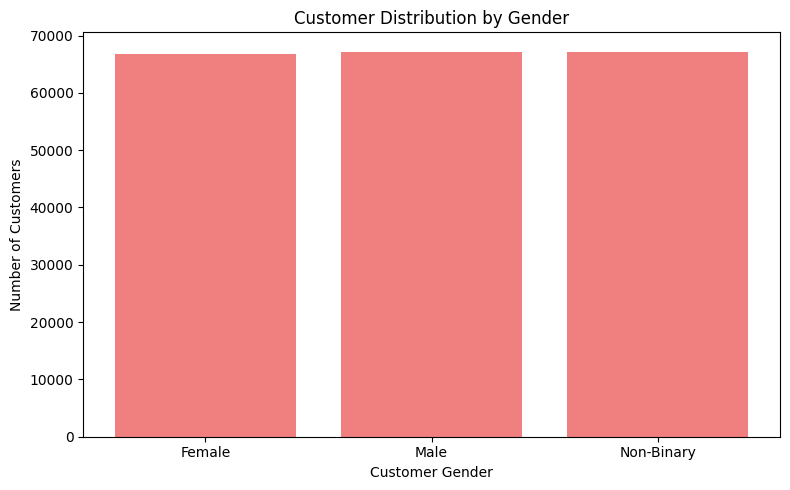

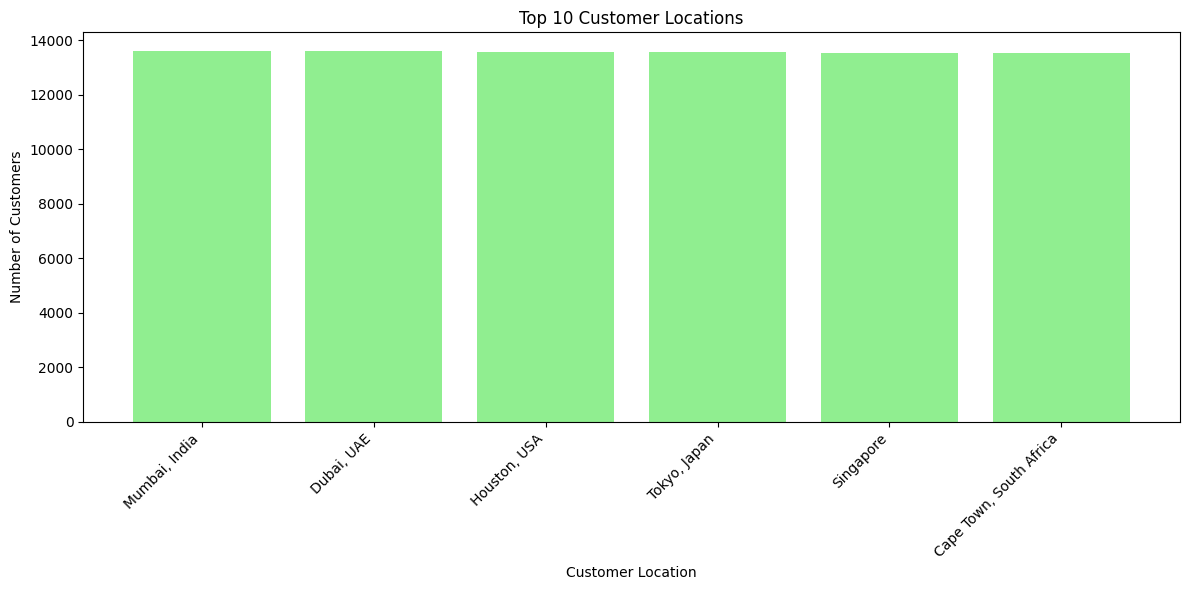

In [21]:
# Customer Distribution By Age Group
plt.figure(figsize=(10, 6))
plt.bar(Age_Category_Counts['Customer Age Group'], Age_Category_Counts['count'], color='skyblue')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Customer Distribution By Gender
plt.figure(figsize=(8, 5))
plt.bar(Gender_Category_Counts['Customer Gender'], Gender_Category_Counts['count'], color='lightcoral')
plt.title('Customer Distribution by Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


# Top 10 Customer Locations
Top_10_Locations = (
    Location_Category_Counts
    .sort_values(by='count', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.bar(Top_10_Locations['Customer Location'], Top_10_Locations['count'], color='lightgreen')
plt.title('Top 10 Customer Locations')
plt.xlabel('Customer Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

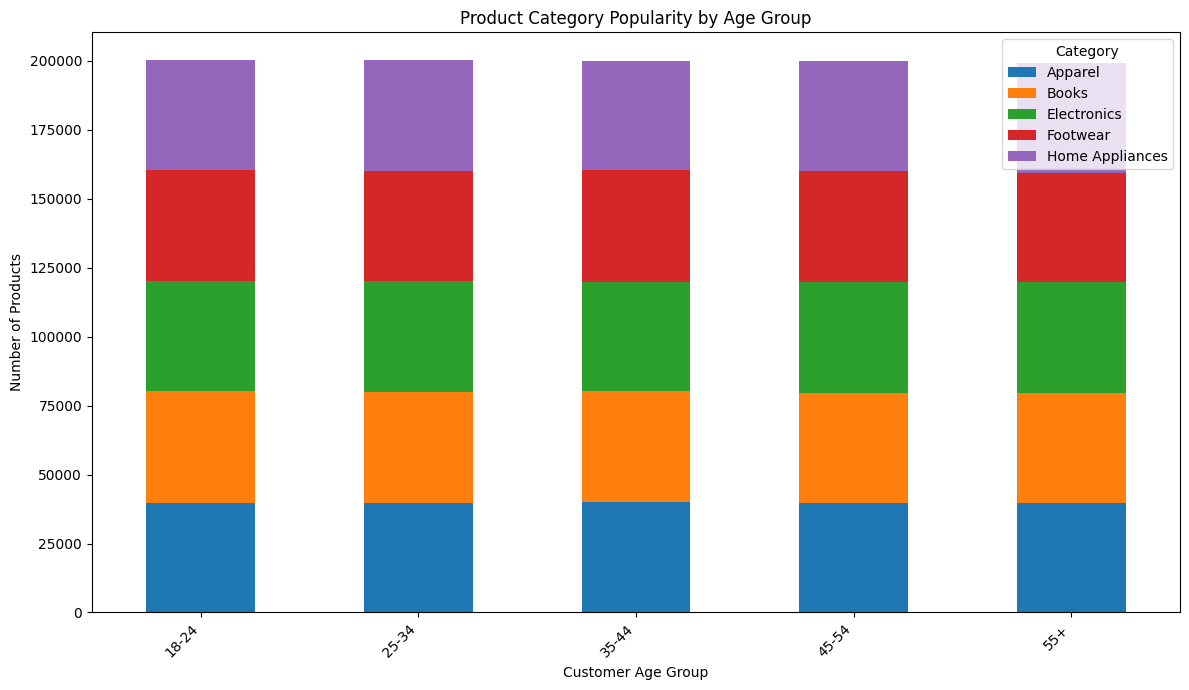

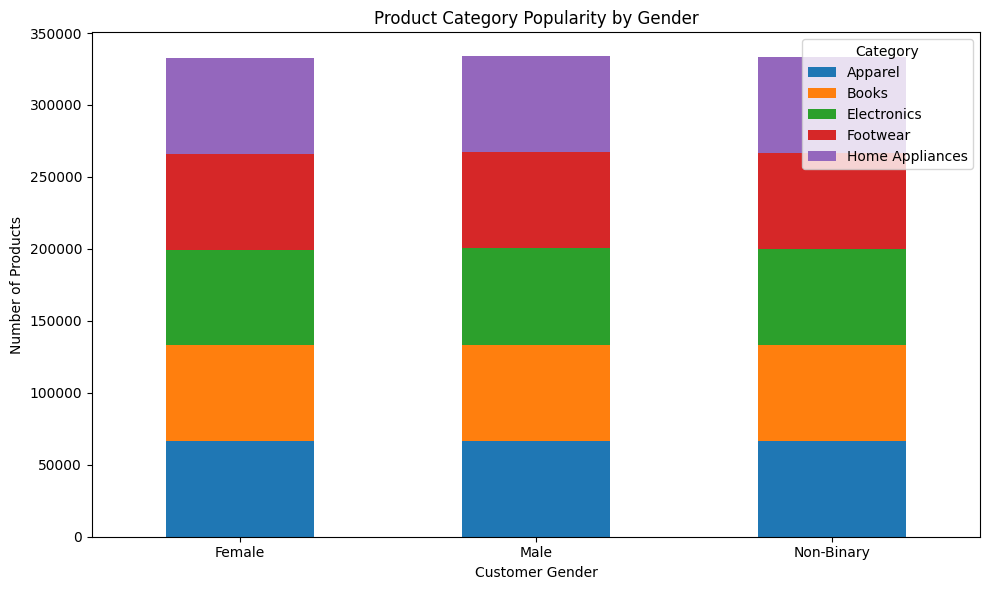

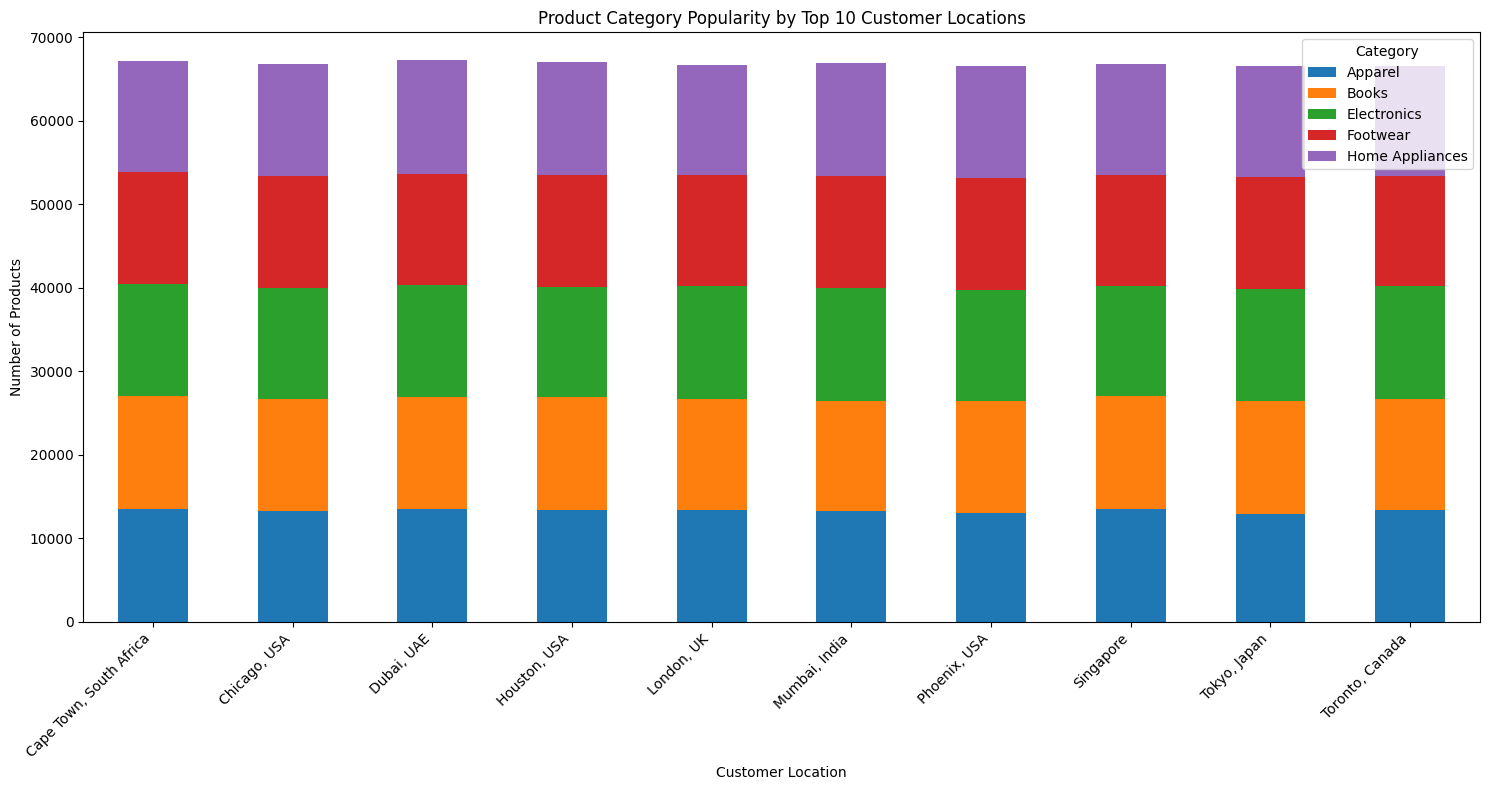

In [23]:
# Age Group Vs Product Category
Age_Category_Pivot = Age_Category_Counts.pivot(
    index='Customer Age Group',
    columns='Category',
    values='count'
)

Age_Category_Pivot.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.title('Product Category Popularity by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Gender Vs Product Category
Gender_Category_Pivot = Gender_Category_Counts.pivot(
    index='Customer Gender',
    columns='Category',
    values='count'
)

Gender_Category_Pivot.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Product Category Popularity by Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Number of Products')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


# Top 10 locations Based On Total Count
Top_10_Locations = (
    Location_Category_Counts.groupby('Customer Location')['count']
    .sum()
    .nlargest(10)
    .index
)

# Filter Data For Those Locations
Location_Category_Counts_Subset = Location_Category_Counts[
    Location_Category_Counts['Customer Location'].isin(Top_10_Locations)
]

# Pivot For Plotting
Location_Category_Pivot = Location_Category_Counts_Subset.pivot(
    index='Customer Location',
    columns='Category',
    values='count'
)

Location_Category_Pivot.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title('Product Category Popularity by Top 10 Customer Locations')
plt.xlabel('Customer Location')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summary:


* **To analyze sales trends, product popularity, and customer preferences.**

*  **Create charts to visualize product performance, regional sales, and shipping trends.**

* **To understand customer segmentation based on demographics, preferences, and location.**

* **To predict product popularity based on features like price, discount, and stock level.**

* **To identify similar product categories for targeted marketing.**
 
* **To predict whether a product will be returned based on its features.**